### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn import metrics
from tqdm.notebook import tqdm
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("emails.csv")

In [3]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [4]:
df.shape

(5172, 3002)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
the,5172.0,6.640565,11.745009,0.0,0.0,3.0,8.0,210.0
to,5172.0,6.188128,9.534576,0.0,1.0,3.0,7.0,132.0
ect,5172.0,5.143852,14.101142,1.0,1.0,1.0,4.0,344.0
and,5172.0,3.075599,6.045970,0.0,0.0,1.0,3.0,89.0
for,5172.0,3.124710,4.680522,0.0,1.0,2.0,4.0,47.0
...,...,...,...,...,...,...,...,...
military,5172.0,0.006574,0.138908,0.0,0.0,0.0,0.0,4.0
allowing,5172.0,0.004060,0.072145,0.0,0.0,0.0,0.0,3.0
ff,5172.0,0.914733,2.780203,0.0,0.0,0.0,1.0,114.0
dry,5172.0,0.006961,0.098086,0.0,0.0,0.0,0.0,4.0


### Without upsampling

In [6]:
df = df.drop("Email No.", axis=1)

In [7]:
df.isna().sum()

the           0
to            0
ect           0
and           0
for           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3001, dtype: int64

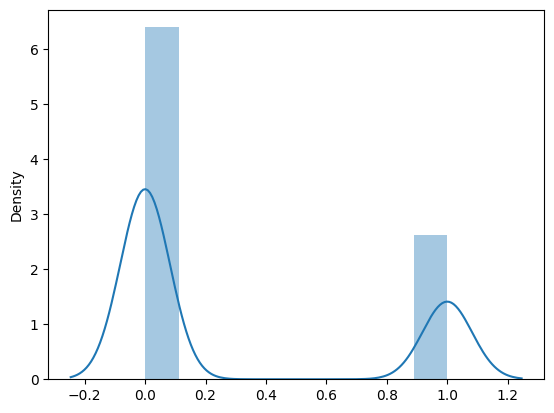

In [8]:
sns.distplot(x=df["Prediction"])
plt.show()

In [9]:
x = df.drop("Prediction", axis=1)
y = df[["Prediction"]]

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### KNN with elbow plot

In [11]:
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]
accuracy_values = []

In [ ]:
for i in tqdm(range(len(k_values))):
    model = KNeighborsClassifier(n_neighbors=k_values[i])
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)
accuracy_values

  0%|          | 0/15 [00:00<?, ?it/s]

In [ ]:
px.line(x=k_values, y=accuracy_values)

In [ ]:
optimal_k = -1
optimal_accuracy = -1
for i in list(zip(k_values, accuracy_values)):
    if i[1] > optimal_accuracy:
        optimal_k = i[0]
        optimal_accuracy = i[1]

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=optimal_k)

In [ ]:
knn_model.fit(x_train, y_train)

In [ ]:
y_pred = knn_model.predict(x_test)

In [ ]:
print(metrics.classification_report(y_test, y_pred))

### SVM

In [ ]:
svm_model = SVC()

In [ ]:
svm_model.fit(x_train, y_train)

In [ ]:
y_pred = svm_model.predict(x_test)

In [ ]:
print(metrics.classification_report(y_test, y_pred))

### With upsampling

In [ ]:
spam_data = df[df["Prediction"] == 1] 
ham_data = df[df["Prediction"] == 0]

In [ ]:
spam_upsample = resample(spam_data,
             replace=True,
             n_samples=int(0.8*len(ham_data)),
             random_state=42)

In [ ]:
new_df = ham_data
new_df = new_df.append(spam_upsample)

In [ ]:
new_df.head()

In [ ]:
new_df.shape

In [ ]:
new_df = new_df.sample(frac=1)

In [ ]:
sns.distplot(new_df["Prediction"])
plt.show()

In [ ]:
x = new_df.drop("Prediction", axis=1)
y = new_df[["Prediction"]]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### KNN with elbow plot

In [ ]:
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]
accuracy_values = []

In [ ]:
for i in tqdm(range(len(k_values))):
    model = KNeighborsClassifier(n_neighbors=k_values[i])
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

In [ ]:
px.line(x=k_values, y=accuracy_values)

In [ ]:
optimal_k = -1
optimal_accuracy = -1
for i in list(zip(k_values, accuracy_values)):
    if i[1] > optimal_accuracy:
        optimal_k = i[0]
        optimal_accuracy = i[1]

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=optimal_k)

In [ ]:
knn_model.fit(x_train, y_train)

In [ ]:
y_pred = knn_model.predict(x_test)

In [ ]:
print(metrics.classification_report(y_test, y_pred))

# SVM

In [ ]:
svm_model = SVC()

In [ ]:
svm_model.fit(x_train, y_train)

In [ ]:
y_pred = svm_model.predict(x_test)

In [ ]:
print(metrics.classification_report(y_test, y_pred))

# Functions

In [ ]:
def read_data(path: str) -> pd.DataFrame:
    """
    Read data from csv file.

    Args:
        path (str): path to csv file.

    Returns:
        pd.DataFrame: dataframe of csv file.
    """
    df = pd.read_csv(path)
    return df

def basic_info(df: pd.DataFrame) -> pd.DataFrame:
    """
    Get basic information of dataframe.
    
    Args:
        df (pd.DataFrame): dataframe.
        
    Returns:
        pd.DataFrame: dataframe of basic information.
    """
    return df.info()

def preprocess(df: pd.DataFrame) -> pd.DataFrame:
    df = df.drop("Email No.", axis=1)
    return df

def split_data(df: pd.DataFrame) -> tuple:
    """
    Split data into train and test set.

    Args:
        df (pd.DataFrame): dataframe.

    Returns:
        tuple: tuple of train and test set.
    """
    x = df.drop("Prediction", axis=1)
    y = df[["Prediction"]]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    return x_train, x_test, y_train, y_test

def knn_model_with_elbow_method(x_train: np.ndarray, x_test: np.ndarray, y_train: np.ndarray, y_test: np.ndarray, k_values: list) -> np.ndarray:
    """
    KNN model with elbow method.

    Args:
        x_train (np.ndarray): x_train data.
        x_test (np.ndarray): x_test data.
        y_train (np.ndarray): y_train data.
        y_test (np.ndarray): y_test data.
        k_values (list): list of k values.

    Returns:
        np.ndarray: y_pred data.
    """
    accuracy_values = []
    for i in tqdm(range(len(k_values))):
        model = KNeighborsClassifier(n_neighbors=k_values[i])
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        accuracy = metrics.accuracy_score(y_test, y_pred)
        accuracy_values.append(accuracy)
    fig = px.line(x=k_values, y=accuracy_values, title="K value vs Accuracy")
    fig.update_layout(xaxis_title="K values", yaxis_title="Accuracy values")
    fig.show()
    optimal_k = -1
    optimal_accuracy = -1
    for i in list(zip(k_values, accuracy_values)):
        if i[1] > optimal_accuracy:
            optimal_k = i[0]
            optimal_accuracy = i[1]
    knn_model = KNeighborsClassifier(n_neighbors=optimal_k)
    knn_model.fit(x_train, y_train)
    y_pred = knn_model.predict(x_test)
    return y_pred

def svm_model(x_train: np.ndarray, x_test: np.ndarray, y_train: np.ndarray, y_test: np.ndarray) -> np.ndarray:
    """
    SVM model.

    Args:
        x_train (np.ndarray): x_train data.
        x_test (np.ndarray): x_test data.
        y_train (np.ndarray): y_train data.
        y_test (np.ndarray): y_test data.

    Returns:
        np.ndarray: y_pred data.
    """
    svm_model = SVC()
    svm_model.fit(x_train, y_train)
    y_pred = svm_model.predict(x_test)
    return y_pred

def metrics_report(y_test: np.ndarray, y_pred: np.ndarray) -> None:
    """
    Print metrics report.

    Args:
        y_test (np.ndarray): y_test data.
        y_pred (np.ndarray): y_pred data.
    """
    print(metrics.classification_report(y_test, y_pred))

def upsample_data(df: pd.DataFrame) -> pd.DataFrame:
    """
    Upsample data.
    
    Args:
        df (pd.DataFrame): dataframe.
        
    Returns:
        pd.DataFrame: upsampled dataframe.
    """
    spam_data = df[df["Prediction"] == 1] 
    ham_data = df[df["Prediction"] == 0]
    spam_upsample = resample(
        spam_data,
        replace=True,
        n_samples=int(0.8*len(ham_data)),
        random_state=42
    )
    new_df = ham_data
    new_df = new_df.append(spam_upsample)
    new_df = new_df.sample(frac=1)
    return new_df

In [ ]:
df = read_data("/kaggle/input/email-spam-classification-dataset-csv/emails.csv")
basic_info(df)
df = preprocess(df)
df = upsample_data(df)
x_train, x_test, y_train, y_test = split_data(df)
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]
y_pred_knn = knn_model_with_elbow_method(x_train, x_test, y_train, y_test, k_values)
y_pred_svm = svm_model(x_train, x_test, y_train, y_test)
print("Metrics for KNN-\n")
metrics_report(y_test, y_pred_knn)
print("Metrics for SVM-\n")
metrics_report(y_test, y_pred_svm)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


  0%|          | 0/15 [00:00<?, ?it/s]

Metrics for KNN-

              precision    recall  f1-score   support

           0       0.96      0.87      0.91      1128
           1       0.85      0.96      0.90       855

    accuracy                           0.91      1983
   macro avg       0.90      0.91      0.91      1983
weighted avg       0.91      0.91      0.91      1983

Metrics for SVM-

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      1128
           1       0.86      0.67      0.76       855

    accuracy                           0.81      1983
   macro avg       0.82      0.80      0.80      1983
weighted avg       0.82      0.81      0.81      1983

